## DSND Project1 

#### DataSets Used:

**For this project two datasets were used**
- Seattle AirBNB Data
- Boston AirBNB Data



#### Problem statment:-
- What features have the highest corrilation with the price
- Can we generlize that if a property is at a certin location it will effect the price


***
***

In [139]:
#Imports
import pandas as pd 
import numpy as np 
import sklearn
from toolbox import describe

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Data Understaning

#### Boston

In [140]:
#Reading the data
boston_listing = pd.read_csv('data/boston/listings.csv')

In [142]:
#understanding the data
boston_listing.columns , boston_listing.shape

(Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
        'space', 'description', 'experiences_offered', 'neighborhood_overview',
        'notes', 'transit', 'access', 'interaction', 'house_rules',
        'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
        'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
        'host_about', 'host_response_time', 'host_response_rate',
        'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
        'host_picture_url', 'host_neighbourhood', 'host_listings_count',
        'host_total_listings_count', 'host_verifications',
        'host_has_profile_pic', 'host_identity_verified', 'street',
        'neighbourhood', 'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
        'smart_location', 'country_code', 'country', 'latitude', 'longitude',
        'is_location_exact', 'property_type', 'room_type', 'accommodates',
     

In [82]:
boston_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [143]:
boston_listing.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   756
Length: 95, dtype: int64

In [144]:
# make a column to identify the city before merging
boston_listing['city'].fillna('boston',inplace=True)
boston_listing['city'].value_counts()

Boston                       3381
Roxbury Crossing               24
Somerville                     19
Jamaica Plain                  18
Brookline                      18
Cambridge                      16
Dorchester                     15
Brighton                       15
Charlestown                    15
Allston                        12
Roslindale                      6
West Roxbury                    5
ROXBURY CROSSING                4
boston                          3
Mattapan                        3
East Boston                     3
ALLSTON                         2
Jamaica Plain, Boston           2
Jamaica Plain                   2
Boston, Massachusetts, US       2
Hyde Park                       2
South Boston                    2
Jamaica Plain, MA               1
South End, Boston               1
Roslindale, Boston              1
Boston (Charlestown)            1
dorchester, boston              1
Newton                          1
Jamaica plain                   1
波士顿           

### seattle

In [145]:
seattle_listing = pd.read_csv('data/seattle/listings.csv')

In [146]:
seattle_listing.columns , seattle_listing.shape

(Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
        'space', 'description', 'experiences_offered', 'neighborhood_overview',
        'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
        'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
        'host_location', 'host_about', 'host_response_time',
        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
        'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
        'host_listings_count', 'host_total_listings_count',
        'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
        'street', 'neighbourhood', 'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
        'smart_location', 'country_code', 'country', 'latitude', 'longitude',
        'is_location_exact', 'property_type', 'room_type', 'accommodates',
        'bathrooms', 'bedrooms', 'beds', 'bed_type', 

In [147]:
seattle_listing.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [148]:
# make a column to identify the city before merging
seattle_listing['city'].fillna('seattle',inplace=True)
seattle_listing['city'].value_counts()

Seattle                  3810
West Seattle                2
Seattle                     2
西雅图                         1
seattle                     1
Ballard, Seattle            1
Phinney Ridge Seattle       1
Name: city, dtype: int64

In [149]:
# visulizing the missing values before merging
def missing_heat_map(DataFrame):
        import numpy as np
        import pandas as pd
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set_style('whitegrid')
        
        
    # plot the missing values
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))
        sns.heatmap(DataFrame.isnull(), yticklabels=False, ax = ax, cbar=False, cmap='viridis')
        ax.set_title('dataset')
        plt.show()
        
    # Calculate the missing values to get a percentage 

        for i in DataFrame:
            print(i,': %',int((DataFrame[i].isnull().sum()/len(DataFrame[i]))*100),\
                  'With {} missing values'.format((DataFrame[i].isnull().sum())))


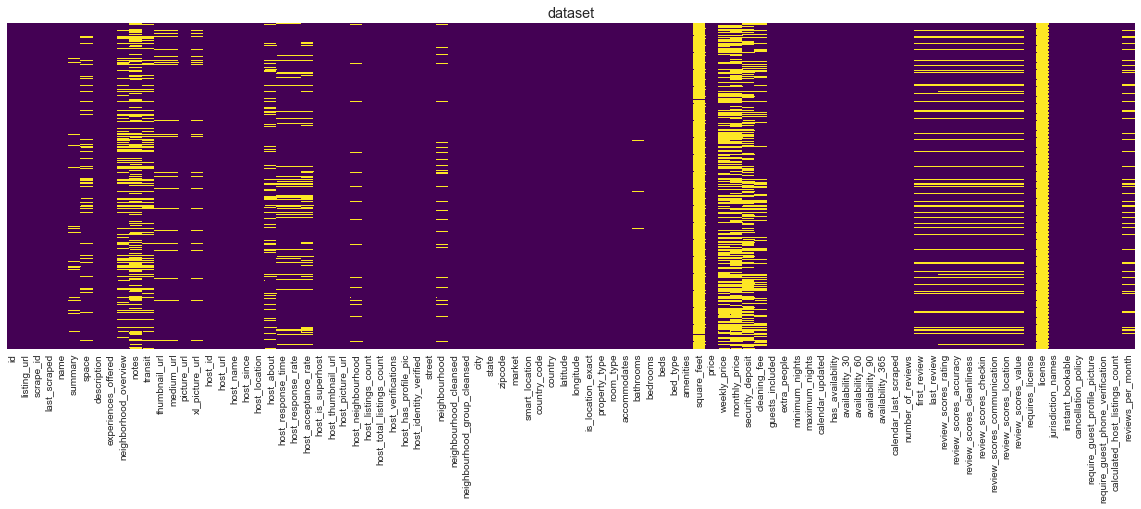

id : % 0 With 0 missing values
listing_url : % 0 With 0 missing values
scrape_id : % 0 With 0 missing values
last_scraped : % 0 With 0 missing values
name : % 0 With 0 missing values
summary : % 4 With 177 missing values
space : % 14 With 569 missing values
description : % 0 With 0 missing values
experiences_offered : % 0 With 0 missing values
neighborhood_overview : % 27 With 1032 missing values
notes : % 42 With 1606 missing values
transit : % 24 With 934 missing values
thumbnail_url : % 8 With 320 missing values
medium_url : % 8 With 320 missing values
picture_url : % 0 With 0 missing values
xl_picture_url : % 8 With 320 missing values
host_id : % 0 With 0 missing values
host_url : % 0 With 0 missing values
host_name : % 0 With 2 missing values
host_since : % 0 With 2 missing values
host_location : % 0 With 8 missing values
host_about : % 22 With 859 missing values
host_response_time : % 13 With 523 missing values
host_response_rate : % 13 With 523 missing values
host_acceptance_rat

In [150]:
# Understand the missing values for seattle dataset
missing_heat_map(seattle_listing)

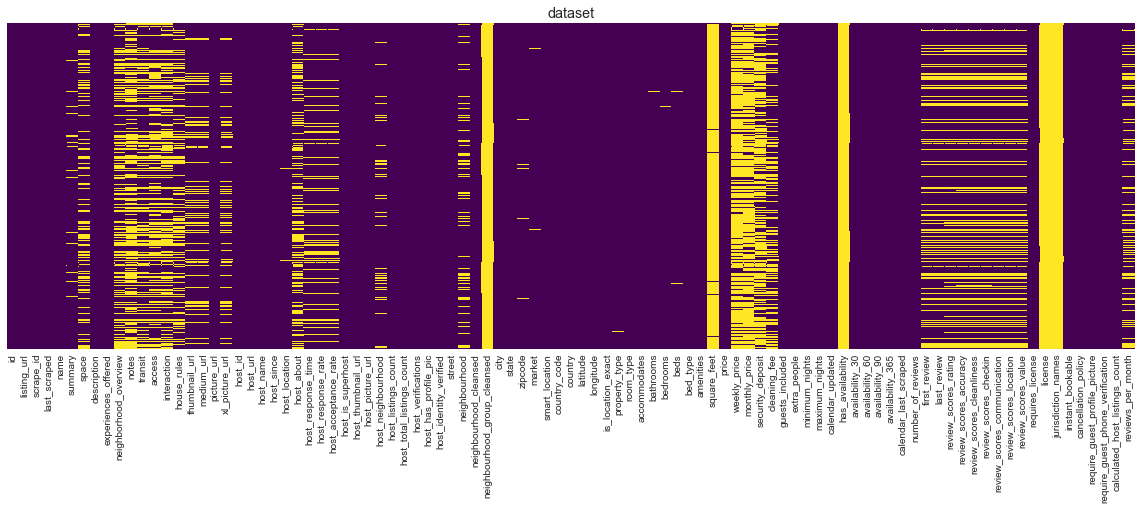

id : % 0 With 0 missing values
listing_url : % 0 With 0 missing values
scrape_id : % 0 With 0 missing values
last_scraped : % 0 With 0 missing values
name : % 0 With 0 missing values
summary : % 3 With 143 missing values
space : % 29 With 1057 missing values
description : % 0 With 0 missing values
experiences_offered : % 0 With 0 missing values
neighborhood_overview : % 39 With 1415 missing values
notes : % 55 With 1975 missing values
transit : % 35 With 1290 missing values
access : % 41 With 1489 missing values
interaction : % 43 With 1554 missing values
house_rules : % 33 With 1192 missing values
thumbnail_url : % 16 With 599 missing values
medium_url : % 16 With 599 missing values
picture_url : % 0 With 0 missing values
xl_picture_url : % 16 With 599 missing values
host_id : % 0 With 0 missing values
host_url : % 0 With 0 missing values
host_name : % 0 With 0 missing values
host_since : % 0 With 0 missing values
host_location : % 0 With 11 missing values
host_about : % 36 With 1309 

In [151]:
# Understand the missing values for the boston dataset
missing_heat_map(boston_listing)

In [153]:
# get the column list that is in both datasets
column_list = set(seattle_listing.columns).intersection(boston_listing.columns)
column_list = list(column_list)

In [154]:
# check that the columns match before merging the two datasets 

# get the unique columns in the seattle dataset
seattle_unique = [x for x in seattle_listing if x not in column_list]
print(seattle_unique)

# get the unique columns in the boston_ls dataset
boston_unique = [x for x in boston_listing if x not in column_list]
print(boston_unique)

[]
['access', 'interaction', 'house_rules']


**This means that both datasets don't have column naming issues**

In [156]:
#Checking the unique columns in the boston dataset
boston_listing[['access','interaction','house_rules']].isnull().sum()

access         1489
interaction    1554
house_rules    1192
dtype: int64

In [157]:
# merge both datasets for an esier cleaning process
df = pd.concat([seattle_listing,boston_listing],ignore_index=True) 

In [159]:
df.shape

(7403, 95)

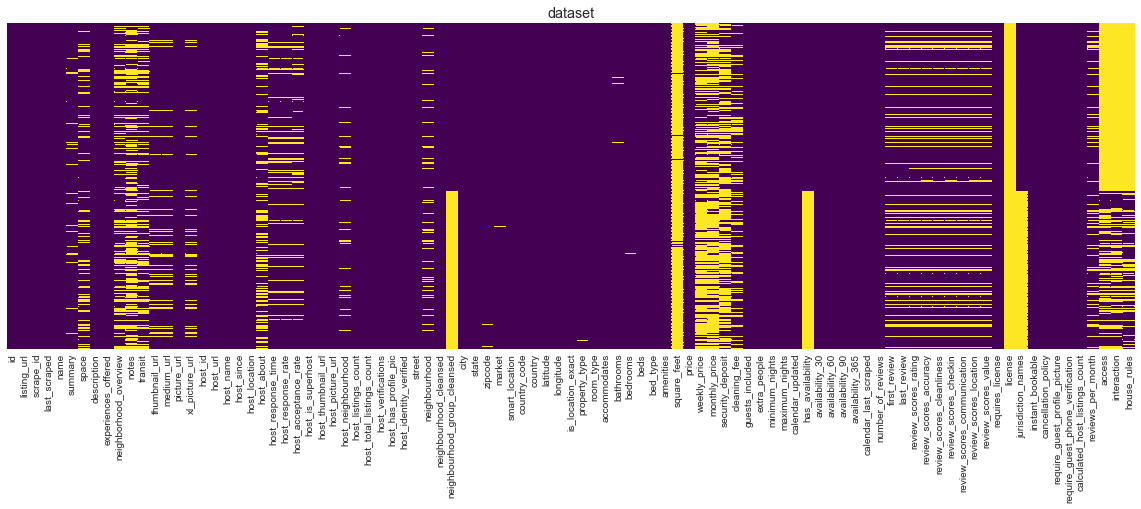

id : % 0 With 0 missing values
listing_url : % 0 With 0 missing values
scrape_id : % 0 With 0 missing values
last_scraped : % 0 With 0 missing values
name : % 0 With 0 missing values
summary : % 4 With 320 missing values
space : % 21 With 1626 missing values
description : % 0 With 0 missing values
experiences_offered : % 0 With 0 missing values
neighborhood_overview : % 33 With 2447 missing values
notes : % 48 With 3581 missing values
transit : % 30 With 2224 missing values
thumbnail_url : % 12 With 919 missing values
medium_url : % 12 With 919 missing values
picture_url : % 0 With 0 missing values
xl_picture_url : % 12 With 919 missing values
host_id : % 0 With 0 missing values
host_url : % 0 With 0 missing values
host_name : % 0 With 2 missing values
host_since : % 0 With 2 missing values
host_location : % 0 With 19 missing values
host_about : % 29 With 2168 missing values
host_response_time : % 13 With 994 missing values
host_response_rate : % 13 With 994 missing values
host_accepta

In [160]:
missing_heat_map(df)

In [166]:
df.dtypes

id                                  int64
last_scraped                       object
name                               object
summary                            object
space                              object
                                   ...   
calculated_host_listings_count      int64
reviews_per_month                 float64
access                             object
interaction                        object
house_rules                        object
Length: 87, dtype: object

In [174]:
df.to_csv('full_data.csv')

***
***

## Data prepreation

In [163]:
# removing some unnessary columns(rest will be removed later)
del df['listing_url']
del df['scrape_id']
del df['picture_url']
del df['xl_picture_url']
del df['host_url']
del df['calendar_last_scraped']
del df['host_thumbnail_url']
del df['medium_url']

In [170]:
df.isnull().sum()

id                                   0
last_scraped                         0
name                                 0
summary                            320
space                             1626
                                  ... 
calculated_host_listings_count       0
reviews_per_month                 1383
access                            5307
interaction                       5372
house_rules                       5010
Length: 87, dtype: int64

**Now I will try to go through each column and evaluate it**

**Since I will not choose an NLP approch.I will extract the number of words each of these strings which might serve as a feature worth exploring**

|Feature|Type|Action|
|---|---|---|
|**summary**|`object`|Get the word count insted|
|**space**|`object`|Get the word count insted|
|**description**|`object`|Get the word count insted|
|**neighborhood_overview**|`object`|Get the word count insted|
|**transit**|`object`|Get the word count insted|
|**host_about**|`object`|Get the word count insted|

In [198]:
def get_wordcount(column,df=df):
    return df[str(column)].apply(lambda x : len(x.split(' ')) if type(x) == str else 0)

In [203]:
# calculate the wordcount of the columns above and apply it to new columns
df['summary_wc'] = get_wordcount('summary')
df['space_wc'] = get_wordcount('space')
df['description_wc'] = get_wordcount('description')
df['neighborhood_overview_wc'] = get_wordcount('neighborhood_overview')
df['transit_wc'] = get_wordcount('transit')
df['host_about_wc'] = get_wordcount('host_about')

In [204]:
# delete the columns 
del df['summary']
del df['space']
del df['description']
del df['neighborhood_overview']
del df['transit']
del df['host_about']